In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow import keras
from keras.utils.np_utils import to_categorical
import numpy as np
import seaborn as sns

In [44]:
train = pd.read_csv("./data/ImakeACupOfCoffeeForYourHead/train.csv")
test = pd.read_csv("./data/ImakeACupOfCoffeeForYourHead/test.csv")

In [45]:
Y_train = train['label']

X_train = train.drop("label", axis = 1)

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

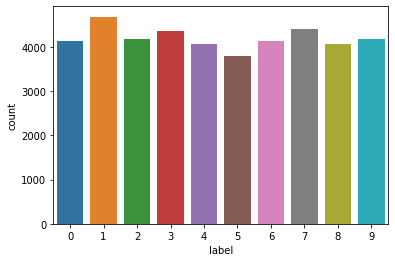

In [46]:
sns.countplot(Y_train)

In [47]:
print(Y_train.shape)

(42000,)


In [48]:
# Reshape image in 3 dimensions (height = 28px, width = 28px, canal = 1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [49]:
# One-hot vector transition of the Ys
Y_train_value = Y_train
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train.shape

(42000, 10)

In [50]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=2, test_size = 0.15)

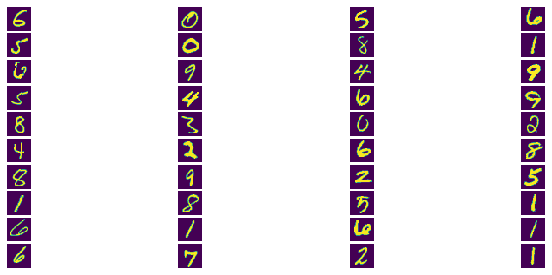

In [51]:
plt.figure(figsize=(12, 4.8))

for i in range(40):
 plt.subplot(10, 4, i + 1)
 plt.imshow(X_train[i].reshape((28, 28)), interpolation='nearest')
 plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [52]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer=keras.optimizers.Adam(lr=0.01))

Epoch 1/200


ValueError: in user code:

    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 28, 28, 1) are incompatible
